# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import collections as co
from datetime import datetime, timedelta
import re

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df = pd.read_csv('main_task.csv')

In [3]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки

In [25]:
pd.set_option('display.max_columns', 200)

In [26]:
df.rename(
    columns={'Price Range': 'price_range', 'Cuisine Style': 'cuisine_style', 'Number of Reviews': 'n_reviews'}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id    40000 non-null object
City             40000 non-null object
cuisine_style    30717 non-null object
Ranking          40000 non-null float64
Rating           40000 non-null float64
price_range      26114 non-null object
n_reviews        37457 non-null float64
Reviews          40000 non-null object
URL_TA           40000 non-null object
ID_TA            40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [7]:
df.describe()

,Ranking,Rating,n_reviews
count,40000.000000,40000.000000,37457.000000
mean,3676.028525,3.993037,124.825480
std,3708.749567,0.668417,295.666352
min,1.000000,1.000000,2.000000
25%,973.000000,3.500000,9.000000
50%,2285.000000,4.000000,33.000000
75%,5260.000000,4.500000,115.000000
max,16444.000000,5.000000,9660.000000


In [8]:
df.head(3)

,Restaurant_id,City,cuisine_style,Ranking,Rating,price_range,n_reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781


***Reviews добавим признаков из колонки

In [27]:
# формируется колонка со списком дат отзывов
df['Reviews1'] = df['Reviews'].apply(lambda x: x.split(", ['", 1)[-1][0:-2])

In [28]:
# формируется колонка с максимальной датой
def custom_r(r):
    maxi = datetime.strptime('01/01/1000', '%m/%d/%Y')
    ss = r.replace("'", '')
    if (ss != "") and (ss != '[[], ['):
        dd = ss.split(',')
        for yy in dd:
            jj = datetime.strptime(yy.strip(), '%m/%d/%Y')
            if maxi < jj:
                maxi = jj
    return maxi


df['Reviews2'] = df.apply(lambda x: custom_r(x['Reviews1']), axis=1)

In [29]:
# формируется колонка с минимальной датой
def custom_r(r):
    mini = datetime.strptime('01/01/3000', '%m/%d/%Y')
    ss = r.replace("'", '')
    if (ss != "") and (ss != '[[], ['):
        dd = ss.split(',')
        for yy in dd:
            jj = datetime.strptime(yy.strip(), '%m/%d/%Y')
            if jj < mini:
                mini = jj
    return mini


df['Reviews3'] = df.apply(lambda x: custom_r(x['Reviews1']), axis=1)

In [30]:
# формируется колонка с разницей между максимаьной и минимаьной датой отзыва
df['Reviews4'] = df['Reviews2']-df['Reviews3']

In [31]:
# формируется колонка с разницей между максимаьной и минимаьной датой отзыва в числовом формате
df['Reviews4'] = df.apply(lambda x: x.Reviews4.days, axis=1)

In [32]:
# убираю вспомогательные значения
df['Reviews2'] = df.apply(lambda x: None if x.Reviews2.strftime(
    "%Y") == '1000' else x.Reviews2, axis=1)

In [33]:
# убираю вспомогательные значения
df['Reviews3'] = df.apply(lambda x: None if x.Reviews3.strftime(
    "%Y") == '3000' else x.Reviews3, axis=1)

In [34]:
# убрать строки с пропусками NaT
df = df.dropna(subset=['Reviews2', 'Reviews3'], axis=0)

In [35]:
# формируется колонка с максимальной датой в числовом формате
df['Reviews5'] = df.apply(lambda x: float(x.Reviews2.asm8), axis=1)

In [36]:
# формируется колонка с минимальной датой в числовом формате
df['Reviews6'] = df.apply(lambda x: float(x.Reviews3.asm8), axis=1)

In [37]:
df.describe()

,Ranking,Rating,n_reviews,Reviews4,Reviews5,Reviews6
count,33529.000000,33529.000000,32583.000000,33529.000000,3.352900e+04,3.352900e+04
mean,3502.695338,4.000298,141.554768,122.455993,1.494602e+18,1.484022e+18
std,3796.181278,0.616752,313.459714,211.247868,3.146293e+16,3.754016e+16
min,1.000000,1.000000,2.000000,0.000000,1.082506e+18,1.082506e+18
25%,825.000000,3.500000,13.000000,8.000000,1.490573e+18,1.474416e+18
50%,1978.000000,4.000000,43.000000,49.000000,1.506384e+18,1.496275e+18
75%,4879.000000,4.500000,137.000000,147.000000,1.512778e+18,1.507939e+18
max,16444.000000,5.000000,9660.000000,3207.000000,1.519603e+18,1.519603e+18


**Применяем dummy признаки исоздаем новые признаки

**City

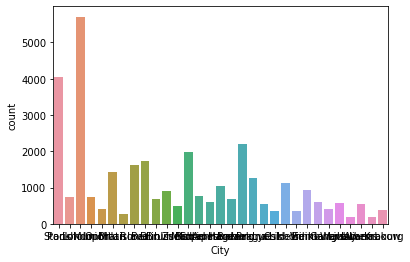

In [258]:
sns.countplot('City', data=df)

In [38]:
# City - оставим 10 часто встречающихся городов, остальные города заменем на 'other'
all_cities = df.City.value_counts().index
top_cities = list(df.City.value_counts().sort_values(
    ascending=False).head(11).index)
cities_to_throw_away = list(set(all_cities) - set(top_cities))
df.loc[df['City'].isin(cities_to_throw_away), 'City'] = 'other'

In [39]:
# создали переменные
dum = pd.get_dummies(df.City, drop_first=True)

In [40]:
# присоединили к данным
df = pd.concat([df, dum], axis=1)

**cuisine_style

In [41]:
# убрали лишнее, а пропуски теперь выглядят, как 'a'
df['cuisine_style'] = df['cuisine_style'].map(lambda x: str(x)[1:][:-1])

In [42]:
# составили список кухонь
cuisine_list = []
for some in df['cuisine_style']:
    for in_list in some.split(', '):
        if in_list != 'a':
            in_list = in_list[1:-1]
        cuisine_list.append(in_list)
# cuisine_list

In [43]:
# посчитали количество упоминаний каждой кухни (пропуск 'a' считаем кухней), пусть это тоже буднет рейтинг
list_rating = co.Counter(cuisine_list).most_common()

In [44]:
# перевели в формат = лист в листе
res = [list(ele) for ele in list_rating]

**формируем dummy признак 'cuisine_rating_dum' кухня, входящая в 10 самых часто встречающихся кухонь

In [61]:
# посчитали количество упоминаний каждой кухни, первые 10
list_rating_dum = co.Counter(cuisine_list).most_common(10)

In [62]:
# перевели в формат = лист в листе
res_dum = [list(ele) for ele in list_rating_dum]

In [63]:
# формируем новый признак cuisine_rating_dum для переменной
def cuisine_rating_dum(rating):
    num = ''
    list_x = rating.replace("'", '')
    list_x = list_x.split(',')
    for yy in list_x:
        yy = yy.strip()
        result = [element for element in res_dum if element[0] == yy]
        if result == []:
            num = 'other'
        else:
            num = result[0][0]
            break
    return num


df['cuisine_rating_dum'] = df.apply(
    lambda x: cuisine_rating_dum(x['cuisine_style']), axis=1)

In [64]:
# создали переменные dum из cuisine_rating_dum
dum = pd.get_dummies(df.cuisine_rating_dum)

In [65]:
# присоединили к данным
df = pd.concat([df, dum], axis=1)

**формируем новый признак 'cuisine_rating' из суммы количеств вхождений каждой кухни в датафрейме

In [45]:
def cuisine_rating(rating):
    num = 0
    list_x = rating.replace("'", '')
    list_x = list_x.split(',')
    for yy in list_x:
        yy=yy.strip()
        result = [element for element in res if element[0] == yy]
        num+=result[0][1]
    return num

df['cuisine_rating']=df.apply(
    lambda x: cuisine_rating(x['cuisine_style']), axis=1)

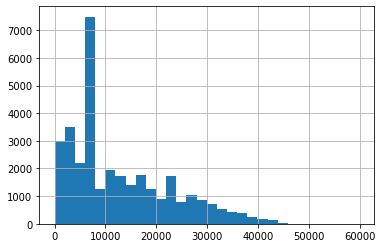

In [46]:
df['cuisine_rating'].hist(bins=30)

**price_range

In [47]:
# Пропуски в price_range заполним самым частым значением
df.price_range.fillna(df['price_range'].mode()[0], inplace=True)

In [48]:
# добавили новый признак price_range_num
def price_range_num(price_range):
    if price_range == '$':
        return 1
    elif price_range == '$$ - $$$':
        return 2
    elif price_range == '$$$$':
        return 3
    
df['price_range_num'] = df['price_range'].apply(price_range_num)

In [49]:
# создали переменные
dum = pd.get_dummies(df.price_range)

In [50]:
# присоединили к данным
df = pd.concat([df, dum], axis=1)

***n_reviews

In [51]:
# n_reviews заменили пропуски средним по колонке
df['n_reviews'].fillna(df['n_reviews'].mean(), inplace=True)

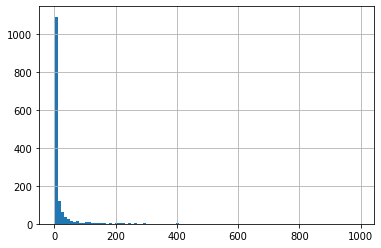

In [52]:
df['n_reviews'].value_counts().hist(bins=100)

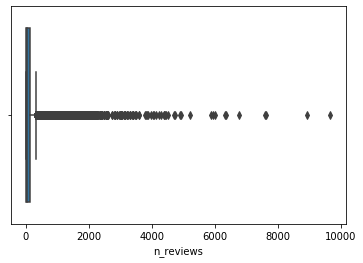

In [320]:
#есть выбросы
sns.boxplot(df['n_reviews'])

In [53]:
IQR = df.n_reviews.quantile(0.75) - df.n_reviews.quantile(0.25)
perc25 = df.n_reviews.quantile(0.25)
perc75 = df.n_reviews.quantile(0.75)
print("Границы выбросов absences: [{f}, {l}].".format(
    f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Границы выбросов absences: [-177.33215173556763, 332.88691955927936].


In [54]:
# сделаем новый признак n_reviews_bool
df['n_reviews_bool'] = df.n_reviews.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)

In [55]:
# сделаем новый признак n_reviews_new
xmean = df['n_reviews'].mean()
df['n_reviews_new'] = df.apply(
    lambda x: x.n_reviews if x.n_reviews_bool == True else xmean, axis=1)

In [57]:
# преобразуем новый признак n_reviews_bool в числовой
def n_reviews_bool(booll):
    if booll == True:
        return 1.0
    else:
        return 2.0


df['n_reviews_bool'] = df['n_reviews_bool'].apply(n_reviews_bool)

In [67]:
df = df.drop(['City', 'other', 'cuisine_rating_dum', 'cuisine_style', 'price_range',
              'Reviews', 'Reviews1', 'Reviews2', 'Reviews3', 'URL_TA', 'ID_TA'], axis=1)

In [101]:
df[:3]

,Restaurant_id,Rating,n_reviews,Reviews4,Reviews5,Reviews6,Barcelona,Berlin,Lisbon,London,Madrid,Milan,Paris,Prague,Rome,Vienna,cuisine_rating,price_range_num,$,$$ - $$$,$$$$,n_reviews_bool,n_reviews_new,Asian,Bar,European,French,Gluten Free Options,Italian,Mediterranean,Vegan Options,Vegetarian Friendly,a
0,id_5569,3.5,194.0,41,1.514678e+18,1.511136e+18,0,0,0,0,0,0,1,0,0,0,13859,2,0,1,0,1.0,194.000000,0,0,1,0,0,0,0,0,0,0
1,id_1535,4.0,10.0,382,1.499299e+18,1.466294e+18,0,0,0,0,0,0,0,0,0,0,6089,2,0,1,0,1.0,10.000000,0,0,0,0,0,0,0,0,0,1
2,id_352,4.5,688.0,2,1.515370e+18,1.515197e+18,0,0,0,1,0,0,0,0,0,0,25359,3,0,0,1,2.0,141.554768,1,0,0,0,0,0,0,0,0,0


In [102]:
df.corr()

,Rating,n_reviews,Reviews4,Reviews5,Reviews6,Barcelona,Berlin,Lisbon,London,Madrid,Milan,Paris,Prague,Rome,Vienna,cuisine_rating,price_range_num,$,$$ - $$$,$$$$,n_reviews_bool,n_reviews_new,Asian,Bar,European,French,Gluten Free Options,Italian,Mediterranean,Vegan Options,Vegetarian Friendly,a
Rating,1.000000,0.029949,-0.087034,0.098910,0.125213,-0.001691,0.053765,0.014333,-0.034123,-0.062708,-0.060252,-0.032539,0.010609,0.054305,0.022709,0.138271,-0.021875,0.059123,-0.085792,0.065232,0.031020,-0.014188,-0.013422,-0.019468,0.043185,0.004376,0.014477,0.009500,0.041562,0.021913,0.059158,-0.022305
n_reviews,0.029949,1.000000,-0.136695,0.186289,0.222592,0.011239,-0.047569,-0.000519,-0.004733,0.000845,0.066969,-0.003043,-0.005278,0.153281,-0.024864,0.396033,0.128861,-0.064202,-0.020366,0.167423,0.695544,0.429650,0.007297,0.061329,0.030577,0.061695,0.059029,0.117071,0.062835,-0.002968,0.030982,-0.176691
Reviews4,-0.087034,-0.136695,1.000000,-0.075070,-0.549112,0.000684,0.032999,-0.008729,-0.065118,0.011064,0.032382,0.039118,-0.001200,-0.001792,0.014242,-0.199526,-0.022562,0.005275,0.014606,-0.040898,-0.129777,-0.181266,-0.024727,-0.059166,-0.028968,-0.015568,-0.024468,0.000912,-0.030198,0.002507,-0.047265,0.059158
Reviews5,0.098910,0.186289,-0.075070,1.000000,0.874613,-0.011392,-0.038197,0.015618,0.084324,-0.040882,-0.031730,-0.043300,-0.007980,0.006417,-0.004311,0.326653,-0.014651,0.045621,-0.068607,0.055387,0.181288,0.265655,0.082720,0.111235,0.059656,0.011363,0.029416,0.029489,0.070454,-0.000982,0.081864,-0.183174
Reviews6,0.125213,0.222592,-0.549112,0.874613,1.000000,-0.009880,-0.048057,0.017333,0.102333,-0.039643,-0.042337,-0.055309,-0.006105,0.006250,-0.010538,0.370781,-0.001310,0.035671,-0.064602,0.066305,0.215037,0.310780,0.081351,0.121994,0.064083,0.017093,0.036550,0.024272,0.073730,-0.002042,0.091591,-0.182283
Barcelona,-0.001691,0.011239,0.000684,-0.011392,-0.009880,1.000000,-0.061930,-0.049147,-0.119973,-0.066211,-0.055823,-0.098133,-0.052209,-0.059602,-0.045107,0.030059,-0.020850,0.020508,-0.015433,-0.007437,0.013262,0.009549,-0.028979,-0.005293,-0.070633,-0.066971,-0.002718,-0.059632,0.248648,-0.003990,-0.010617,-0.006928
Berlin,0.053765,-0.047569,0.032999,-0.038197,-0.048057,-0.061930,1.000000,-0.043386,-0.105908,-0.058449,-0.049279,-0.086629,-0.046088,-0.052615,-0.039819,-0.024080,-0.008328,0.001716,0.005820,-0.015546,-0.045288,-0.076387,0.007719,-0.027492,0.003703,-0.047257,-0.012293,-0.005527,-0.032503,0.015369,0.013260,0.048636
Lisbon,0.014333,-0.000519,-0.008729,0.015618,0.017333,-0.049147,-0.043386,1.000000,-0.084048,-0.046385,-0.039107,-0.068748,-0.036575,-0.041755,-0.031600,0.013096,-0.028103,0.027244,-0.020068,-0.010794,-0.000504,-0.008763,-0.028398,-0.022097,0.110871,-0.049507,-0.003398,-0.052067,0.081697,0.005756,-0.016590,0.002730
London,-0.034123,-0.004733,-0.065118,0.084324,0.102333,-0.119973,-0.105908,-0.084048,1.000000,-0.113230,-0.095465,-0.167820,-0.089284,-0.101928,-0.077138,-0.028050,-0.006132,0.003658,-0.000146,-0.006798,-0.015561,-0.005131,0.091949,0.093196,-0.077186,-0.089963,0.055601,-0.055115,-0.043886,0.009229,0.049891,-0.015560
Madrid,-0.062708,0.000845,0.011064,-0.040882,-0.039643,-0.066211,-0.058449,-0.046385,-0.113230,1.000000,-0.052686,-0.092618,-0.049274,-0.056253,-0.042572,-0.038512,0.011778,-0.011434,0.008439,0.004493,-0.001083,0.020722,-0.031580,-0.014680,-0.066897,-0.066398,0.000970,-0.067220,0.156178,0.000195,-0.004089,0.011139


In [108]:
#уберу Ranking, Reviews6, other
df = df.drop(['Ranking','other','Reviews6'], axis=1)

KeyError: "['Ranking' 'other' 'Reviews6'] not found in axis"

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [104]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Restaurant_id', 'Rating'], axis=1)
y = df['Rating']

In [70]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [105]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [72]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [106]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [107]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.45072306197917555
